In [2]:
%run modulesWithLags.ipynb

In [3]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15
WIDTH = 500 # could modify later

from matplotlib import gridspec
from brokenaxes import brokenaxes
import os

plt.rc('font', size=BIGGER_SIZE, family='sans-serif', serif='Arial') # controls default text sizes
plt.rc('lines', linewidth=2) # make lines thicker
plt.rc('axes', linewidth=1)
plt.rc('xtick', labelsize = BIGGER_SIZE)

def set_size(width, scale=1, fraction = 1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * scale

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio / fraction

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

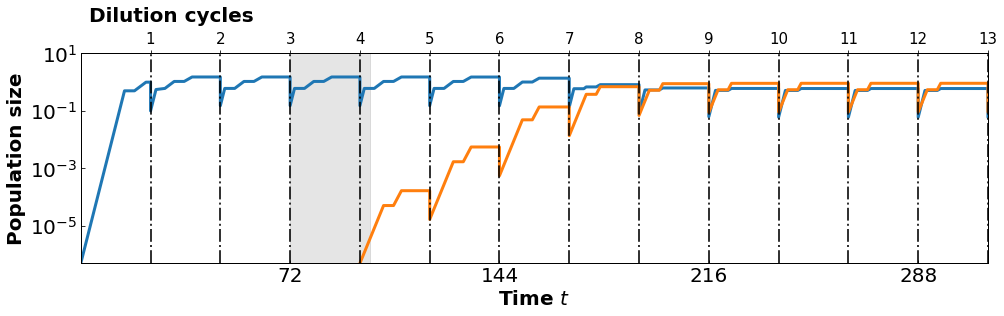

In [5]:
# set the parameters of dynamics
Res = [1.0, 1.0, 1.0]
preference_list  = [(1, 0, 2), (0, 1, 2)]
growth_rate_list = [[0.4, 2.1, 0.3], [1.3, 1.1, 1.0]]
scaling = 1.5
growth_rate_list = [[j * scaling for j in i] for i in growth_rate_list]
Size = 1
Nr = 3
Nb = 2
yields_list = 0.5*np.ones([Nb, Nr])
b0 = 5e-7 # density of bug when introduced/initial
b_threshold = 1e-6 # extinction density
c_threshold = 1e-9 # concentration threshold
# dilution parameters
D = 1e-1
lagTime = 1 # lag
T_dilute = 7 # time interval between dilutions
dilute_to_steady = 3 # #(dilution) between invasions
invasion_list = [1,0]
#start simulating the dynamics
movestep = 0
details = {'res_begin':[], 't_info':[], 'res_left':[], 'bug_info':[], 'res_concent':[]}
#system = {'res_available': np.heaviside(Res, 0), 'res_concentration': [i for i in Res], 'bug_available': [0 for i in range(Nb)], 'bug_density': [0 for i in range(Nb)]} 
system = {'res_available': np.heaviside(Res, 0), 'res_concentration': [i for i in Res], 'bug_available': [0, 0], 'bug_density': [0, 0]} 
#system, el = invade(system, 0)
system, extlist = invade(system, 0, growth_rate_list)
system, extlist = invade(system, 1, growth_rate_list)
# start plotting the dynmaics
section = [1, 17]
bug_info = details["bug_info"]
t_info = details["t_info"]
if section != "all":
    bug_info = bug_info[section[0]:section[1]]
    t_info = t_info[section[0]:section[1]]
bugset = []
timesteps = 0
for i in range(len(bug_info)):
    bugset+=bug_info[i][0]
    timesteps += len(bug_info[i][1])
bugset=list(set(bugset))#去重
lines = []
times = []
times_markers=[]
for i in range(len(t_info)):
    times += [i*T_dilute+j for j in t_info[i]]
    times_markers+=[i*T_dilute+j for j in t_info[i] if j != 0 and j != T_dilute]
for i in range(len(bugset)):
    bug = bugset[i]
    bugtrace = [bug]
    for k in range(len(bug_info)):
        if bug in bug_info[k][0]:
            bugtrace+=[j[bug_info[k][0].index(bug)] for j in bug_info[k][1]]
        else:
            bugtrace+=[0 for j in bug_info[k][1]]
    lines.append(bugtrace)
#bax = brokenaxes(ylims=((-1, .7), (.79, 1)), hspace=.05)

# plot the figure
fig = plt.figure(constrained_layout=True, figsize = set_size(2*WIDTH, fraction=2))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
Ncol = 6 #number of columns in the subplots
div = 1 #see below
for bugtrace in lines:
    ycoords = [(i+(i==0)*1e-8) for i in bugtrace[1:]][:8] + [(i+(i==0)*1e-8) for i in bugtrace[1:]][26:]
    ax1.plot(times[:8] + [i - 14 for i in times[26:]], ycoords, label="species "+str(bugtrace[0]+1), linewidth = 3)

for i in range(1, 20):
    ax1.axvline(T_dilute*i, color = 'k', linestyle = '-.', alpha = 0.8)

ax1.axvspan(21, 29, color = 'k', alpha = 0.1)
#ax1.axvspan(times[18+7], times[19+7], color = 'y', alpha = 0.2)
#ax1.axvspan(times[21+7], times[22+7], color = 'y', alpha =  0.2)
    
ax1.set_ylim(b0, 10)
ax1.set_xlim(0, 91)
ax1.set_yscale('log')
ax1.tick_params(direction = 'in', which = 'both', labelsize = 20)
ax1.set_xticks([21 * i for i in range(1, 5)])
ax1.set_xticklabels([72 * i for i in range(1, 5)])
ax1.set_ylabel("Population size", fontsize = 20, fontweight = 'bold')
ax1.set_xlabel("Time $t$", fontsize = 20, fontweight = 'bold')

new_tick_locations = [(i+1)*T_dilute for i in range(13)]
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(range(1, 14))
ax2.set_xlabel('Dilution cycles', fontsize = 20, fontweight = 'bold')
ax2.xaxis.set_label_coords(0.1, 1.15)
ax2.tick_params(labelsize = 15)
plt.savefig('figsversion1/fig1-1.pdf')
#plt.show()

17


<ipython-input-52-ece5347ba548>:79: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  plt.savefig('figsversion1/fig1-2.pdf')
<ipython-input-52-ece5347ba548>:79: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  plt.savefig('figsversion1/fig1-2.pdf')
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.can

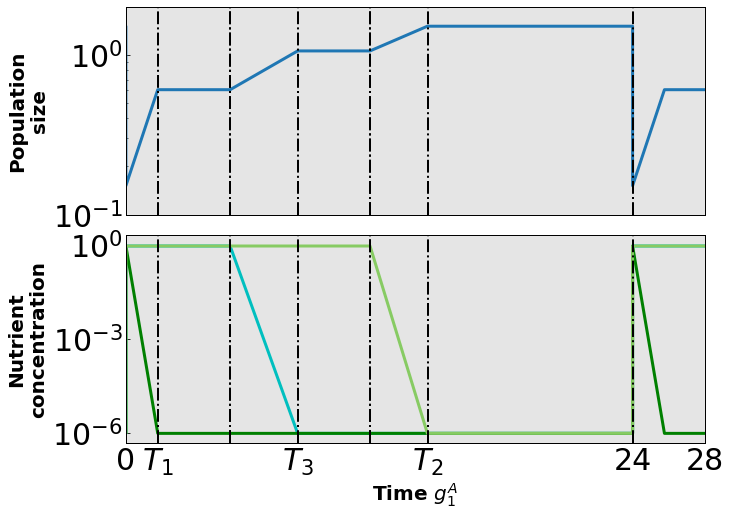

In [52]:
fig = plt.figure(constrained_layout=True, figsize = set_size(1.5*WIDTH, fraction=0.8))
gs = gridspec.GridSpec(2, 1)
gs.update(hspace=0.1) # set the 2 subplots very close
ax1 = fig.add_subplot(gs[0, 0]) #left part takes 0:div columns
ax2 = fig.add_subplot(gs[1, 0]) # right part takes div:else columns

# plot the populations

x1, x2, y1, y2 = 21.0, 29.0, 0.1, 2 # specify the limits
ax1.set_xlim(x1, x2) # apply the x-limits
ax1.set_ylim(y1, y2) # apply the y-limits
for bugtrace in lines:
    ycoords = [(i+(i==0)*1e-8) for i in bugtrace[1:]][:9] + [(i+(i==0)*1e-8) for i in bugtrace[1:]][31:]
    ax1.plot(times[:9] + [i - 21 for i in times[31:]], ycoords, label="species "+str(bugtrace[0]+1), linewidth = 3)
ax1.set_yscale('log')
ax1.set_xticks([])
ax1.set_yticks([1e0, 1e-1])
ax1.tick_params(direction = 'in', which = 'both', labelsize = 30)
for i in range(18, 26):
    ax1.axvline(times[i], linestyle = '-.', color = 'k')
ax1.axvspan(x1, x2, color = 'k', alpha = 0.1)
ax1.set_ylabel('Population\nsize', fontsize = 20, fontweight = 'bold')

# plot the nutrients

section = 'all'
bug_info = details["bug_info"]
print(len(bug_info))
t_info = details["t_info"]
nut_info = details['res_concent']
if section != "all":
    bug_info = bug_info[section[0]:section[1]]
    t_info = t_info[section[0]:section[1]]
    nut_info = details['res_concent'][section[0]:section[1]]
bugset = []
timesteps = 0
for i in range(len(bug_info)):
    bugset+=bug_info[i][0]
    timesteps += len(bug_info[i][1])
bugset=list(set(bugset))#去重
lines = []
times = []
times_markers=[]

for i in range(len(t_info)):
    times += [i*T_dilute+j for j in t_info[i]]
    times_markers+=[i*T_dilute+j for j in t_info[i] if j != 0 and j != T_dilute]
for i in range(len(bugset)):
    bug = bugset[i]
    bugtrace = [bug]
    for k in range(len(bug_info)):
        if bug in bug_info[k][0]:
            bugtrace+=[j[bug_info[k][0].index(bug)] for j in bug_info[k][1]]
        else:
            bugtrace+=[0 for j in bug_info[k][1]]
    lines.append(bugtrace)

colors = ['c', 'g', '#87cb63']
for nut in range(Nr):
    nuttrace = []
    for i in (nut_info):
        for tpoint in i:
            nuttrace.append(tpoint[nut])
    ycoords = [(i+(i<=1e-6)*1e-6) for i in nuttrace]
    ax2.plot(times[:9] + [i - 21 for i in times[22:]], ycoords[:9] + ycoords[22:], label = 'nutrient' + str(nut+1), linewidth = 3, color = colors[nut])

ax2.set_xlim(x1, x2) # apply the x-limits
ax2.set_yscale('log')
for i in range(18, 26):
    ax2.axvline(times[i], linestyle = '-.', color = 'k')
ax2.axvspan(x1, x2, color = 'k', alpha = 0.1)
ax2.set_xticks([21] + [times[i] for i in [18, 21, 24]] + [28] + [29])
ax2.set_xticklabels(['0', '$T_1$', '$T_3$', '$T_2$', '24', '28'])
ax2.tick_params(direction = 'in', which = 'both', labelsize = 30)
ax2.set_xlabel('Time $g_1^A$', fontsize = 20, fontweight = 'bold')
ax2.set_ylabel('Nutrient\nconcentration', fontsize = 20, fontweight = 'bold')
ax2.set_yticks([1e0, 1e-3, 1e-6])
#ax2.legend(prop={'size': 14})
plt.savefig('figsversion1/fig1-2.pdf')
plt.show()

[5e-07, 0.011930492771049472, 0.0011930492771049473, 0.5001085044797368, 0.5001085044797368, 0.5001085044797368, 1.0001085044797366, 1.0001085044797366, 0.10001085044797367, 0.5545563049934287, 0.5545563049934287, 0.5545563049934287, 1.0091017595388831, 1.0091017595388831, 1.0091017595388831, 1.509101759538887, 1.509101759538887, 0.1509101759538887, 0.6054556304993431, 0.6054556304993431, 0.6054556304993431, 1.0600010850447976, 1.0600010850447976, 1.0600010850447976, 1.0606054556304993, 1.0606054556304993, 1.0606054556304993, 1.515150910175954, 1.515150910175954, 0.15151454653959026, 0.6060600010850449, 0.6060600010850449, 0.6060600010850449, 1.0605668981148701, 1.0605668981148701, 1.0605668981148701, 1.5150231844052129, 1.5150231844052129, 0.1515023184405213, 0.6060477729859758, 0.6060477729859758, 0.6060477729859758, 1.0596087722788572, 1.0596087722788572, 1.0596087722788572, 1.5118901466866232, 1.5118901466866232, 0.15118901466866233, 0.6057344692141168, 0.6057344692141168, 0.605734

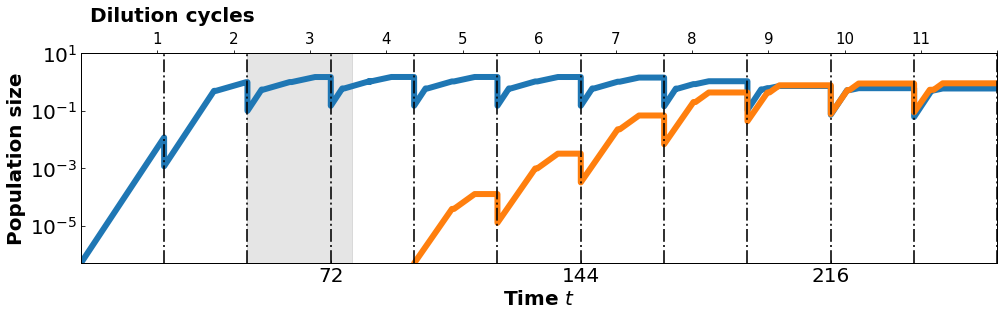

In [15]:
# set the parameters of dynamics
Res = [1.0, 1.0, 1.0]
preference_list  = [(1, 0, 2), (0, 1, 2)]
growth_rate_list = [[0.4, 2.1, 0.3], [2.0, 1.1, 1.0]]
scaling = 1.2
growth_rate_list = [[j * scaling for j in i] for i in growth_rate_list]
Size = 1
Nr = 3
Nb = 2
yields_list = 0.5*np.ones([Nb, Nr])
b0 = 5e-7 # density of bug when introduced/initial
b_threshold = 1e-6 # extinction density
c_threshold = 1e-9 # concentration threshold
# dilution parameters
D = 1e-1
lagTime = 0.1 # lag
T_dilute = 4 # time interval between dilutions
dilute_to_steady = 3 # #(dilution) between invasions
invasion_list = [1,0]
#start simulating the dynamics
movestep = 0
details = {'res_begin':[], 't_info':[], 'res_left':[], 'bug_info':[], 'res_concent':[]}
#system = {'res_available': np.heaviside(Res, 0), 'res_concentration': [i for i in Res], 'bug_available': [0 for i in range(Nb)], 'bug_density': [0 for i in range(Nb)]} 
system = {'res_available': np.heaviside(Res, 0), 'res_concentration': [i for i in Res], 'bug_available': [0, 0], 'bug_density': [0, 0]} 
#system, el = invade(system, 0)
system, extlist = invade(system, 0, growth_rate_list)
system, extlist = invade(system, 1, growth_rate_list)


# start plotting the dynmaics
# modify the tau
lagNew = 0.2
section = [1, 15]
bug_info = details["bug_info"]
t_info = details["t_info"]
if section != "all":
    bug_info = bug_info[section[0]:section[1]]
    t_info = t_info[section[0]:section[1]]
bugset = []
timesteps = 0
for i in range(len(bug_info)):
    bugset+=bug_info[i][0]
    timesteps += len(bug_info[i][1])
bugset=list(set(bugset))#去重
lines = []
times = []
times_markers=[]
for i in range(len(t_info)):
    times += [i*T_dilute+j for j in t_info[i]]
    times_markers+=[i*T_dilute+j for j in t_info[i] if j != 0 and j != T_dilute]
for i in range(len(bugset)):
    bug = bugset[i]
    bugtrace = [bug]
    for k in range(len(bug_info)):
        if bug in bug_info[k][0]:
            bugtrace+=[j[bug_info[k][0].index(bug)] for j in bug_info[k][1]]
        else:
            bugtrace+=[0 for j in bug_info[k][1]]
    lines.append(bugtrace)
#bax = brokenaxes(ylims=((-1, .7), (.79, 1)), hspace=.05)

# plot the figure
fig = plt.figure(constrained_layout=True, figsize = set_size(2*WIDTH, fraction=2))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
Ncol = 6 #number of columns in the subplots
div = 1 #see below
for bugtrace in lines:
    ycoords = [(i+(i==0)*1e-8) for i in bugtrace[1:]]
    xcoords = times[:24] + [i - 12 for i in times[48:]]
    ycoords = ycoords[:24]+ycoords[48:]
    print(ycoords)
    ax1.plot(xcoords, ycoords, label="species "+str(bugtrace[0]+1), linewidth = 6)

for i in range(1, 12):
    ax1.axvline(T_dilute*i, color = 'k', linestyle = '-.', alpha = 0.8)

ax1.axvspan(8, 13, color = 'k', alpha = 0.1)
#ax1.axvspan(times[18+7], times[19+7], color = 'y', alpha = 0.2)
#ax1.axvspan(times[21+7], times[22+7], color = 'y', alpha =  0.2)
    
ax1.set_ylim(b0, 10)
ax1.set_xlim(0, 44)
ax1.set_yscale('log')
ax1.tick_params(direction = 'in', which = 'both', labelsize = 20)
ax1.set_xticks([3*T_dilute * i for i in range(1, 4)])
ax1.set_xticklabels([72 * i for i in range(1, 4)])
ax1.set_ylabel("Population size", fontsize = 20, fontweight = 'bold')
ax1.set_xlabel("Time $t$", fontsize = 20, fontweight = 'bold')

new_tick_locations = [(i+1)*T_dilute for i in range(12)]
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(range(1, 12))
ax2.set_xlabel('Dilution cycles', fontsize = 20, fontweight = 'bold')
ax2.xaxis.set_label_coords(0.1, 1.15)
ax2.tick_params(labelsize = 15)
plt.savefig('figsversion1/fig1-1.pdf')
#plt.show()

25


<ipython-input-59-55eca67f1689>:117: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  plt.savefig('figsversion1/fig1-2.pdf')
<ipython-input-59-55eca67f1689>:117: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  plt.savefig('figsversion1/fig1-2.pdf')
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.c

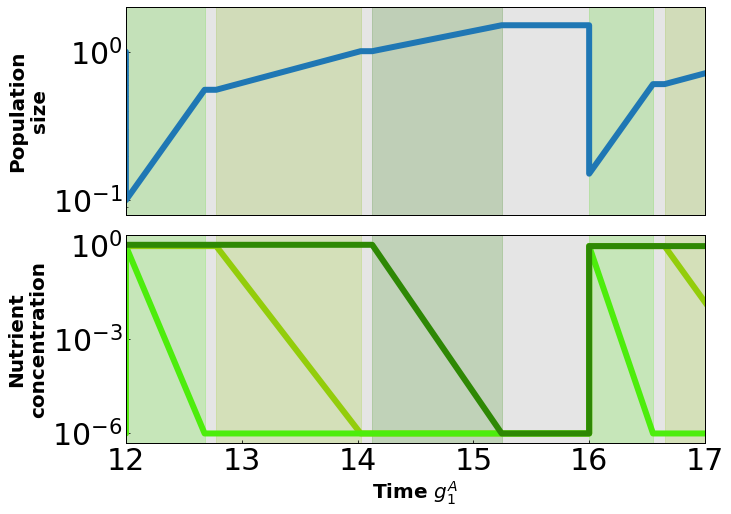

In [59]:
fig = plt.figure(constrained_layout=True, figsize = set_size(1.5*WIDTH, fraction=0.8))
gs = gridspec.GridSpec(2, 1)
gs.update(hspace=0.1) # set the 2 subplots very close
ax1 = fig.add_subplot(gs[0, 0]) #left part takes 0:div columns
ax2 = fig.add_subplot(gs[1, 0]) # right part takes div:else columns

# plot the populations

x1, x2, y1, y2 = 8, 13, 0.08,2 # specify the limits

colors = ['#93cd0b', '#4ded0c', '#2e8804']

section = [1, 15]
bug_info = details["bug_info"]
t_info = details["t_info"]
if section != "all":
    bug_info = bug_info[section[0]:section[1]]
    t_info = t_info[section[0]:section[1]]
bugset = []
timesteps = 0
for i in range(len(bug_info)):
    bugset+=bug_info[i][0]
    timesteps += len(bug_info[i][1])
bugset=list(set(bugset))#去重
lines = []
times = []
times_markers=[]
for i in range(len(t_info)):
    times += [i*T_dilute+j for j in t_info[i]]
    times_markers+=[i*T_dilute+j for j in t_info[i] if j != 0 and j != T_dilute]
for i in range(len(bugset)):
    bug = bugset[i]
    bugtrace = [bug]
    for k in range(len(bug_info)):
        if bug in bug_info[k][0]:
            bugtrace+=[j[bug_info[k][0].index(bug)] for j in bug_info[k][1]]
        else:
            bugtrace+=[0 for j in bug_info[k][1]]
    lines.append(bugtrace)
ax1.set_xlim(x1, x2) # apply the x-limits
ax1.set_ylim(y1, y2) # apply the y-limits
for bugtrace in lines:
    ycoords = [(i+(i==0)*1e-8) for i in bugtrace[1:]]
    xcoords = times[:24] + [i - 12 for i in times[48:]]
    ycoords = ycoords[:24]+ycoords[48:]
    ax1.plot(xcoords, ycoords, label="species "+str(bugtrace[0]+1), linewidth = 6)
ax1.axvspan(xcoords[8], xcoords[9], color = colors[1], alpha = 0.2)
ax1.axvspan(xcoords[11], xcoords[12], color = colors[0], alpha = 0.2)
ax1.axvspan(xcoords[14], xcoords[15], color = colors[2], alpha = 0.2)
ax1.axvspan(xcoords[17], xcoords[18], color = colors[1], alpha = 0.2)
ax1.axvspan(xcoords[20], xcoords[21], color = colors[0], alpha = 0.2)
ax1.set_yscale('log')
ax1.set_xticks([])
ax1.set_yticks([1e0, 1e-1])
ax1.tick_params(direction = 'in', which = 'both', labelsize = 30)
ax1.axvspan(x1, x2, color = 'k', alpha = 0.1)
ax1.set_ylabel('Population\nsize', fontsize = 20, fontweight = 'bold')

# plot the nutrients

section = 'all'
bug_info = details["bug_info"]
print(len(bug_info))
t_info = details["t_info"]
nut_info = details['res_concent']
if section != "all":
    bug_info = bug_info[section[0]:section[1]]
    t_info = t_info[section[0]:section[1]]
    nut_info = details['res_concent'][section[0]:section[1]]
bugset = []
timesteps = 0
for i in range(len(bug_info)):
    bugset+=bug_info[i][0]
    timesteps += len(bug_info[i][1])
bugset=list(set(bugset))#去重
lines = []
times = []
times_markers=[]

for i in range(len(t_info)):
    times += [i*T_dilute+j for j in t_info[i]]
    times_markers+=[i*T_dilute+j for j in t_info[i] if j != 0 and j != T_dilute]
for i in range(len(bugset)):
    bug = bugset[i]
    bugtrace = [bug]
    for k in range(len(bug_info)):
        if bug in bug_info[k][0]:
            bugtrace+=[j[bug_info[k][0].index(bug)] for j in bug_info[k][1]]
        else:
            bugtrace+=[0 for j in bug_info[k][1]]
    lines.append(bugtrace)
    
for nut in range(Nr):
    nuttrace = []
    for i in (nut_info):
        for tpoint in i:
            nuttrace.append(tpoint[nut])
    xcoords = times[:24] + [i - 12 for i in times[50:]]
    ycoords = [(i+(i<=1e-6)*1e-6) for i in nuttrace]
    ax2.plot(xcoords, ycoords[:24] + ycoords[50:], label = 'nutrient' + str(nut+1), linewidth = 6, color = colors[nut])

ax2.set_xlim(12, 17) # apply the x-limits
ax2.set_yscale('log')
ax2.axvspan(12, 17, color = 'k', alpha = 0.1)
ax2.axvspan(xcoords[10], xcoords[11], color = colors[1], alpha = 0.2)
ax2.axvspan(xcoords[13], xcoords[14], color = colors[0], alpha = 0.2)
ax2.axvspan(xcoords[16], xcoords[17], color = colors[2], alpha = 0.2)
ax2.axvspan(xcoords[19], xcoords[20], color = colors[1], alpha = 0.2)
ax2.axvspan(xcoords[22], xcoords[23], color = colors[0], alpha = 0.2)
# ax2.set_xticks([21] + [times[i] for i in [18, 21, 24]] + [28] + [29])
# ax2.set_xticklabels(['0', '$T_1$', '$T_3$', '$T_2$', '24', '28'])
ax2.tick_params(direction = 'in', which = 'both', labelsize = 30)
ax2.set_xlabel('Time $g_1^A$', fontsize = 20, fontweight = 'bold')
ax2.set_ylabel('Nutrient\nconcentration', fontsize = 20, fontweight = 'bold')
ax2.set_yticks([1e0, 1e-3, 1e-6])
#ax2.legend(prop={'size': 14})
plt.savefig('figsversion1/fig1-2.pdf')
plt.show()